#1. Random Forest Classifier - Predicting Heart Disease


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml
heart = fetch_openml("heart", version=1)

In [5]:
df=pd.DataFrame(heart.data, columns=heart.feature_names)
df.head()

ValueError: Shape of passed values is (270, 1), indices imply (270, 13)

In [6]:
import pandas as pd
from sklearn.datasets import fetch_openml

heart = fetch_openml("heart", version=1)

# Convert the sparse matrix to a dense array
heart_data = heart.data.toarray()

# Now create the DataFrame with the dense data
df = pd.DataFrame(heart_data, columns=heart.feature_names)
df.head()

,att_1,att_2,att_3,att_4,att_5,att_6,att_7,att_8,att_9,att_10,att_11,att_12,att_13
0,0.708333,1.0,1.000000,-0.320755,-0.105023,-1.0,1.0,-0.419847,-1.0,-0.225806,0.0,1.000000,-1.0
1,0.583333,-1.0,0.333333,-0.603774,1.000000,-1.0,1.0,0.358779,-1.0,-0.483871,0.0,-1.000000,1.0
2,0.166667,1.0,-0.333333,-0.433962,-0.383562,-1.0,-1.0,0.068702,-1.0,-0.903226,-1.0,-1.000000,1.0
3,0.458333,1.0,1.000000,-0.358491,-0.374429,-1.0,-1.0,-0.480916,1.0,-0.935484,0.0,-0.333333,1.0
4,0.875000,-1.0,-0.333333,-0.509434,-0.347032,-1.0,1.0,-0.236641,1.0,-0.935484,-1.0,-0.333333,-1.0


In [7]:
df['target']=pd.DataFrame(heart.target)
df.head()

,att_1,att_2,att_3,att_4,att_5,att_6,att_7,att_8,att_9,att_10,att_11,att_12,att_13,target
0,0.708333,1.0,1.000000,-0.320755,-0.105023,-1.0,1.0,-0.419847,-1.0,-0.225806,0.0,1.000000,-1.0,1.0
1,0.583333,-1.0,0.333333,-0.603774,1.000000,-1.0,1.0,0.358779,-1.0,-0.483871,0.0,-1.000000,1.0,-1.0
2,0.166667,1.0,-0.333333,-0.433962,-0.383562,-1.0,-1.0,0.068702,-1.0,-0.903226,-1.0,-1.000000,1.0,1.0
3,0.458333,1.0,1.000000,-0.358491,-0.374429,-1.0,-1.0,-0.480916,1.0,-0.935484,0.0,-0.333333,1.0,-1.0
4,0.875000,-1.0,-0.333333,-0.509434,-0.347032,-1.0,1.0,-0.236641,1.0,-0.935484,-1.0,-0.333333,-1.0,-1.0


In [8]:
df.isnull().sum()

,0
att_1,0
att_2,0
att_3,0
att_4,0
att_5,0
att_6,0
att_7,0
att_8,0
att_9,0
att_10,0


<Axes: >

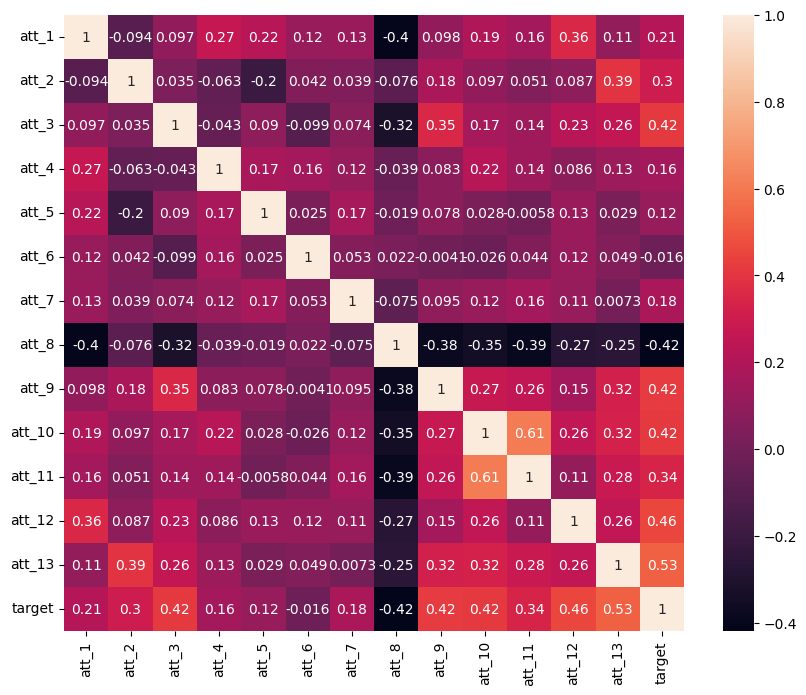

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [14]:
from sklearn.model_selection import train_test_split
X=df.drop('target',axis=1)
y=df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
rdmodel=RandomForestClassifier()
rdmodel.fit(X_train,y_train)
y_pred=rdmodel.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[31  2]
 [ 6 15]]
              precision    recall  f1-score   support

        -1.0       0.84      0.94      0.89        33
         1.0       0.88      0.71      0.79        21

    accuracy                           0.85        54
   macro avg       0.86      0.83      0.84        54
weighted avg       0.86      0.85      0.85        54



In [18]:
from sklearn.model_selection import RandomizedSearchCV
params={
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ["gini", "entropy"]
}
rdmodel1=RandomForestClassifier()
rdcv=RandomizedSearchCV(rdmodel1,params,cv=5,n_iter=5,n_jobs=-1)
rdcv.fit(X_train,y_train)
print(rdcv.best_params_)

{'n_estimators': 50, 'min_samples_split': 10, 'max_depth': 10, 'criterion': 'entropy'}


In [19]:
rdmodel2=RandomForestClassifier(criterion='entropy',max_depth=30,min_samples_split=10,n_estimators=50)
rdmodel2.fit(X_train,y_train)
y_pred=rdmodel2.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[32  1]
 [ 4 17]]
              precision    recall  f1-score   support

        -1.0       0.89      0.97      0.93        33
         1.0       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



In [22]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(rdmodel2,filled=True)

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_split=10,
                       n_estimators=50) instead.

<Figure size 1500x1000 with 0 Axes>

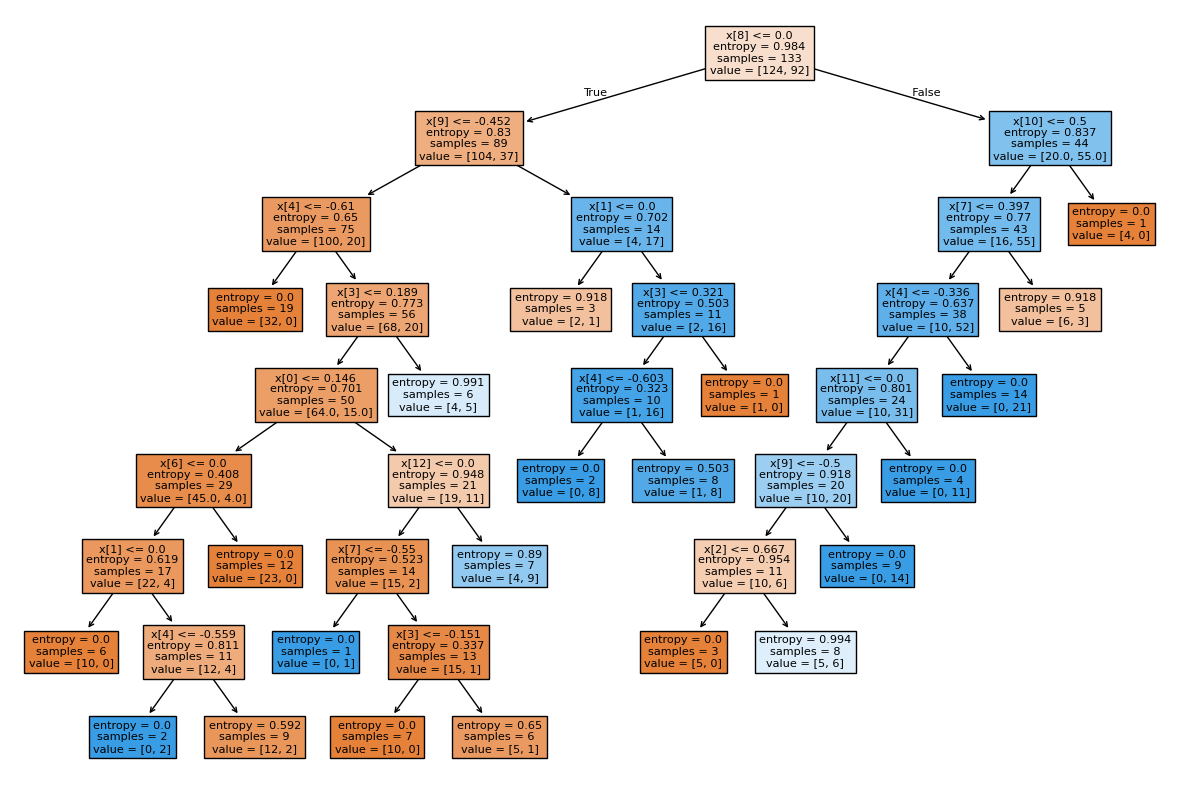

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming 'rdmodel2' is your trained RandomForestClassifier
# Access the first decision tree in the forest (index 0)
plt.figure(figsize=(15, 10))
tree.plot_tree(rdmodel2.estimators_[0], filled=True)
plt.show()

#2. Random Forest Regressor

In [25]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Target"] = data.target

In [26]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [28]:
from sklearn.model_selection import train_test_split
X=df.drop('Target',axis=1)
y=df['Target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [31]:
from sklearn.ensemble import RandomForestRegressor
rdmodel=RandomForestRegressor()
rdmodel.fit(X_train,y_train)
y_pred=rdmodel.predict(X_test)

In [32]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8054763831747669
0.2549054939676781


In [33]:
from sklearn.model_selection import RandomizedSearchCV
params={
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ["auto", "sqrt", "log2"]
}
rdrmodel=RandomForestRegressor()
rdcv=RandomizedSearchCV(rdrmodel,params,cv=5,n_iter=5,n_jobs=-1)
rdcv.fit(X_train,y_train)
print(rdcv.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': None}


In [34]:
rdmodel=RandomForestRegressor(max_depth=None,max_features='sqrt',min_samples_split=2,n_estimators=200)
rdmodel.fit(X_train,y_train)
y_pred=rdmodel.predict(X_test)

In [35]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.814841395799286
0.24263349734316875
